# data analysis

In [1]:
from config import config
import pandas as pd
from matplotlib import pyplot as plt
import wordcloud
import os
from recommender_system.optimization.dimensionality_reduction import DimensionReduce
from config import config
import os

root_path = os.path.dirname(os.path.realpath('__file__'))
project_path = os.path.dirname(root_path)

### The most popular genres

In [3]:
data = pd.read_csv(config["dataset"]["moviesPath"])
popular_genres = (data.genres.str.split('|').explode().value_counts())
popular_genres.sort_values(ascending=False)
popular_genres.head(10)

Drama        4361
Comedy       3756
Thriller     1894
Action       1828
Romance      1596
Adventure    1263
Crime        1199
Sci-Fi        980
Horror        978
Fantasy       779
Name: genres, dtype: int64

(-0.5, 399.5, 199.5, -0.5)

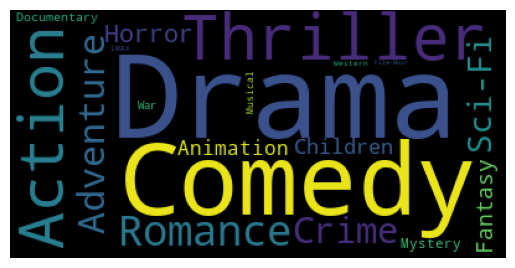

In [13]:
genre_wordcloud = wordcloud.WordCloud()
genre_wordcloud.generate_from_frequencies(popular_genres.to_dict())
plt.figure()
plt.imshow(genre_wordcloud)
plt.axis('off')

# Evaluations

## Accuracy RMSE

### Collabrative filtering

In [2]:
from evaluations.rmse_evaluation_script import evaluation_with_rmse

if __name__ == '__main__':
    user_id = 610
    test_size = 0.2
    mse_list = []
    for user_id in range(1, 610):
        mse = evaluation_with_rmse(user_id, test_size)
        mse_list.append(mse)
    print(sum(mse_list)/len(mse_list))
    print(evaluation_with_rmse(user_id, test_size))

/Users/echo/Desktop/saclay/alg_with_ds/project/recommender_system/recommender_system/collaborative_filtering.py:94: RuntimeWarning: invalid value encountered in divide
  recommendation_rankings = (sum_weighted_ratings_matrix.T / np.array(weight_sum_list).T).T
/Users/echo/Desktop/saclay/alg_with_ds/project/recommender_system/recommender_system/collaborative_filtering.py:94: RuntimeWarning: invalid value encountered in divide
  recommendation_rankings = (sum_weighted_ratings_matrix.T / np.array(weight_sum_list).T).T
/Users/echo/Desktop/saclay/alg_with_ds/project/recommender_system/recommender_system/collaborative_filtering.py:94: RuntimeWarning: invalid value encountered in divide
  recommendation_rankings = (sum_weighted_ratings_matrix.T / np.array(weight_sum_list).T).T
/Users/echo/Desktop/saclay/alg_with_ds/project/recommender_system/recommender_system/collaborative_filtering.py:94: RuntimeWarning: invalid value encountered in divide
  recommendation_rankings = (sum_weighted_ratings_ma

1.6259088962361226
0.33296174171411164


Text(0, 0.5, 'number of users')

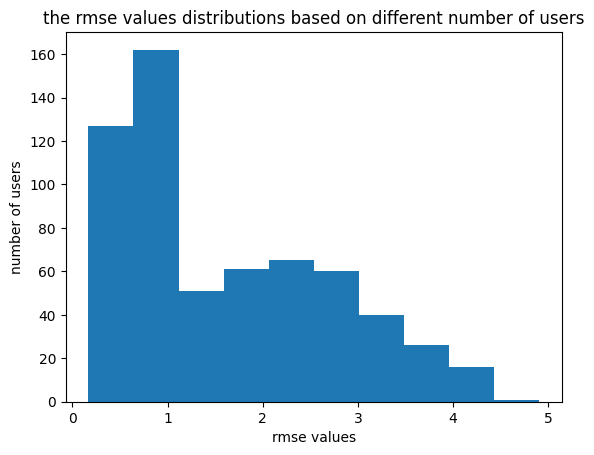

In [8]:
plt.hist(mse_list)
plt.title("the rmse values distributions based on different number of users")
plt.xlabel("rmse values")
plt.ylabel("number of users")

Text(0, 0.5, 'rmse values')

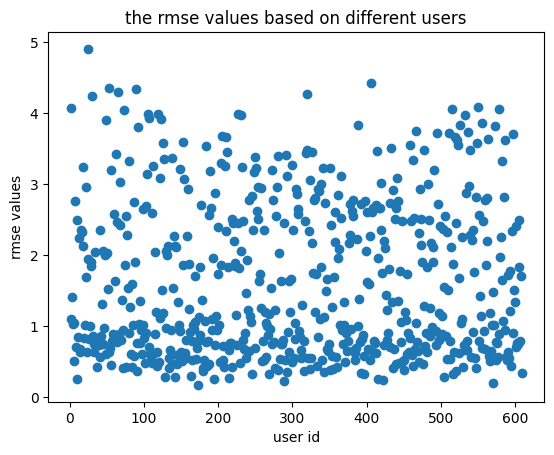

In [6]:
plt.scatter(range(1,610), mse_list)
plt.title("the rmse values based on different users")
plt.xlabel("user id")
plt.ylabel("rmse values")

### SVD

In [8]:
data_path = root_path + config["dataset"]["ratingPath"]
data = pd.read_csv(data_path,usecols=['userId', 'movieId', 'rating'])
demonsion_reduction = DimensionReduce(data)
algo = demonsion_reduction.svd()
rmse = demonsion_reduction.predict_rmse(algo)

RMSE: 0.8802


## Accuracy Precision@k

### content based

## Computational time

### Collaborative filtering

In [2]:
import time
from recommender_system.content_based import ContentBasedRecommender

number_k = 10
user_id = 1
test_size = 0.2
content_recommender = ContentBasedRecommender()
retrieval_methods=["faiss", "LSH", None]
for retrieval in retrieval_methods:
    start = time.time()
    print(content_recommender.get_ordered_rankings(user_id, test_size, retrieval_method=retrieval))
    predict_movies = list(content_recommender.get_ordered_rankings(user_id, test_size, retrieval_method=retrieval).keys())[:number_k]
    end = time.time()
    print(end-start)



[515, 42007, 4640, 111146, 53318, 113225, 52299, 150604, 600, 7257, 45662, 7263, 2661, 30825, 106100, 95875, 106648, 57502, 123553, 2725, 160422, 148652, 8379, 116413, 97470, 5311, 129737, 4810, 31435, 6863, 78034, 118997, 26326, 53464, 2784, 27369, 88812, 34542, 168174, 3325, 6405, 92422, 8461, 162578, 40723, 5401, 61210, 40732, 61729, 91947, 6987, 59731, 107348, 1888, 7012, 37741, 93040, 4465, 3955, 62836, 142196, 40819, 1914, 179073, 27523, 7058, 97172, 130452, 7071, 26564, 59333, 52694, 90600, 26603, 3565, 2032, 7161, 7165]
0.1293790340423584


AssertionError: 

## LSH

In [9]:
import time
from recommender_system.optimization.lsh_retrieval import LSHRetrieval

query = 1
lsh = LSHRetrieval()
lsh.insert()
start = time.time()
res = lsh.query(1, 100)
end = time.time()
print(end - start)
# res = np.array(res)
# print(res)
print("len", len(res))


0.13098406791687012
len 10


/Users/echo/Desktop/saclay/alg_with_ds/project/recommender_system/recommender_system/evaluation.py:78: RuntimeWarning: invalid value encountered in divide
  cos_sim = np.sum(matrix_a * matrix_b, axis=1) / (
